# Exercise 1

## Introduction

In this exercise we are considering a simple reservoir as shown below. 

![image.png](figures/reservoir.png)

The behavior of this reservoir is defined by the mass balance equation:

\begin{equation}
\Delta S = P - E - Q
\end{equation}


The discharge in the reservoir can be expressed as a function of stored water in the reservoir:

\begin{equation}
Q = f(S)
\end{equation}

P and E represent precipitation and the actual evaporation respectively.

## 1. Linear Reservoir without External Drivers

At first we will consider the reservoir without the external drivers ```P``` and ```E``` and we assume that Q is equal to:

\begin{equation}
Q = k S ^\alpha
\end{equation}

Next to this, we also assmume a linear reservoir, so $\alpha$ is equal to 1.

With these assumptions, the system can be solved analytically. This makes it possible to calculate the storage and discharge at any time by knowing the initial condition and the ```k``` value.

## Part 1

Derive the analytical solution of the reservoir, as mentioned without the external drivers and as a **linear** reservoir. 

However, for hydrological systems it is not realistic to neglect the external drivers. If we take into account these drivers, the equation cannot be solved analytically, but has to be solved numerically.

An example of a numerical solution is the explicit forward Euler method. This method calculates the state of a system at each time step considering the state of the system at the previous time step and rate of changes:

\begin{equation}
S(t + \Delta t) = F(S(t))
\end{equation}

If we consider the linear reservoir problem without the external drivers, we obtain:

\begin{equation}
\frac{dS}{dt} = -k S ^\alpha
\end{equation}

The forward Euler method yields:
\begin{equation}
\frac{S(t + \Delta t) - S(t)}{\Delta t} = -kS^\alpha
\end{equation}

This results in the numerical solution:

\begin{equation}
S(t + \Delta t) = S(t) + - k \Delta t k S ^\alpha
\end{equation}

Hence, if $ S(t) $ is known, $ S(t + \Delta t) $ can be calculated in one iteration.

Complete the functions in the code cells below to calculate the analytical and numerical solution of the linear reservoir problem without external drivers. 

The following (starting) values can be used; during the exercise, you can change $ k $ and $ t_{max} $:

- $ S_0 = 75 $ mm
- $ k = 0.01 $ d$^{-1}$
- $ t_0 = 0 $ days
- $ t_{max} = 200 $ days

The following questions might help you write the script:

1. What do you want to calculate?
2. Which variables need to be defined?
3. For how many time steps do you want to calculate the output?
4. How can a for loop help you to calculate the output for multiple time steps (search in help)?
5. How can you use a function for this exercise?

First import the relevant packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
S0 = 75 #mm
k = 0.01 #per day
t0 = 0 #days
tmax = 200 #days
dt = 1 #days
alpha = 1 

In [57]:
def analytical_solve():

    return S, t



In [53]:
def numerical_solve(S0, k, t_end, dt, alpha):
    
    ### BEGIN SOLUTION
    t = np.arange(0, t_end+1, dt)
    S = np.zeros(len(t))
    S[0] = S0
    for i in range(len(t)-1):
        S[i+1] = S[i] - k * dt * S[i] ** alpha
    return S, t
    ### END SOLUTION
    
    

In [61]:
### BEGIN HIDDEN TESTS
# Definieer een functie die de analytische oplossing berekent
def analytical_solve_a(S0, k, t0, t_end):
    t = np.linspace(t0, t_end, t_end + 1)
    S = S0 * np.exp(-k * (t)) 
    return S, t

# Voer dezelfde functie uit met de door de student gekozen parameters

S_check, t_check = analytical_solve_a(S0, k, t0, tmax)

# Controleer of de door de student ingediende resultaten correct zijn
assert np.allclose(S_a, S_check)
assert np.allclose(t_a, t_check)
### END HIDDEN TESTS

### BEGIN HIDDEN TESTS
# Definieer een functie die de analytische oplossing berekent
def numerical_solve_a(S0, k, t0, t_end):
    t = np.arange(0, t_end+1, dt)
    S = np.zeros(len(t))
    S[0] = S0
    for i in range(len(t)-1):
        S[i+1] = S[i] - k * dt * S[i] ** alpha
    return S, t

# Voer dezelfde functie uit met de door de student gekozen parameters

S_check, t_check = numerical_solve_a(S0, k, t_end, dt, alpha)

# Controleer of de door de student ingediende resultaten correct zijn
assert np.allclose(S_n, S_check)
assert np.allclose(t_n, t_check)
### END HIDDEN TESTS

NameError: name 'S_a' is not defined

## Part 3

Plot both the analytical and numerical solution on a single graph. Try different values for the timestep ```dt``` and the ```k``` values to investigate their influence. Observe how the solutions compare to each other.

In [62]:
### plot the solutions

## Linear Reservoir with External Drivers

Hydrological models tend to mimic the interactions of the system with external drivers; therefore, as mentioned earlier, neglecting the external drivers is not realistic. Considering external drivers, the water balance equation cannot be solved analytically because precipitation and evaporation cannot be formulated; therefore, we rely on numerical analysis.

## Part 4

Write a script in the code cell below to calculate the numerical solution of the linear reservoir problem including the external drivers (see the model structure in the figure). The values for precipitation and evaporation are given in P_PE_date.txt. You can use the same values as in the previous assignment for the other variables.

The following questions might help you to systematically set up your script:

1. What do you want to calculate?
2. Which part of the previous script can you reuse?
3. Which (additional) variables need to be defined?
4. Which column of P_PE.txt represents precipitation and potential evaporation? Why?
5. What should be the time step?
6. Which formulas do you need?
7. How can you take into account the different fluxes?

## Bonus Question

The average runoff coefficient $ \alpha $ of this catchment is between 0.3 and 0.35. Try to change the values of the parameters $ k $ and $ \alpha $ in such a way that your modeled runoff coefficient is between 0.3 and 0.35 as well. But be careful to have a more or less reasonable hydrograph as well!

Behaviour of reservoir:

\begin{equation}
\frac{dS}{dt} = -Q + P - E
\end{equation}

with discharge Q as 

\begin{equation}
Q = f(S)
\end{equation}


In [6]:
from datetime import date
data = pd.read_csv('P_PE_date.txt', skipinitialspace=True, delimiter=' ', names=['year', 'month', 'day', 'P', 'E'])
P_PE = pd.DataFrame()
P_PE['P'] = data['P']
P_PE['PE'] = data['E']
P_PE.index = data.apply(lambda x: date(int(x.year), int(x.month), int(x.day)), axis=1)
P_PE.index = pd.to_datetime(P_PE.index, format='%Y-%m-%d')

In [7]:
def storage(S0, k, alpha, data):
    dt = 1
    S = np.zeros(len(data))
    S[0] = S0
    for i in range(len(data)-1):
        S[i+1] = S[i] - k * dt * S[i] ** alpha + data['P'].iloc[i] * dt - data['PE'].iloc[i] * dt
        if S[i+1] < 0:
            S[i+1] = 0
    data['S'] = S
    return data
    

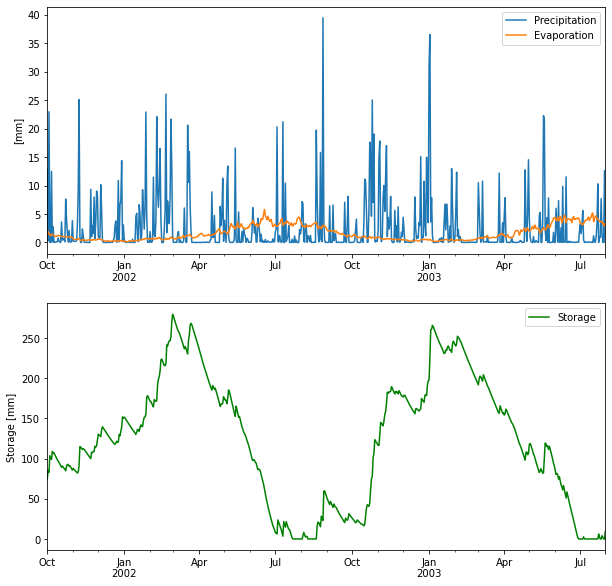

In [8]:
df_storage = storage(S0, k, alpha, P_PE)

fig, ax = plt.subplots(2, figsize=(10,10))
df_storage['P'].plot(ax=ax[0], ylabel='[mm]', label='Precipitation')
df_storage['PE'].plot(ax=ax[0], label='Evaporation')
df_storage['S'].plot(ax=ax[1], label='Storage', color='green', ylabel='Storage [mm]')
ax[0].legend()
ax[1].legend()

### Bonus

The average runoff coefficient Q/P of this catchment is between 0.3 and 0.35. Try to change the
values of the parameters k and α in such a way that your modelled runoff coefficient is between 0.3
and 0.35 as well. But be careful to have a more or less reasonable hydrograph as well!!!

In [9]:
k = 0.003
alpha = 1
df_storage = storage(S0, k, alpha, P_PE)
df_storage['Q'] = k * df_storage['S'] ** alpha

Q_mean = df_storage.Q.mean()
P_mean = df_storage.P.mean()
runoff = Q_mean / P_mean
runoff

0.3207042419706667

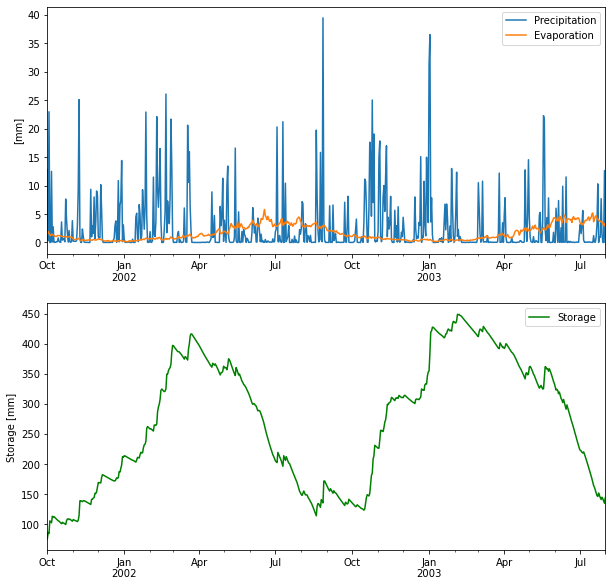

In [10]:
fig, ax = plt.subplots(2, figsize=(10,10))
df_storage['P'].plot(ax=ax[0], ylabel='[mm]', label='Precipitation')
df_storage['PE'].plot(ax=ax[0], label='Evaporation')
df_storage['S'].plot(ax=ax[1], label='Storage', color='green', ylabel='Storage [mm]')
ax[0].legend()
ax[1].legend()

In [14]:
def fobj(p, S0, P_PE):
    k, alpha = p
    df_storage = storage(S0, k, alpha, P_PE)
    df_storage['Q'] = k * df_storage['S'] ** alpha
    Q_mean = df_storage.Q.mean()
    P_mean = df_storage.P.mean()
    runoff = Q_mean / P_mean
    runoff_model = 0.34
    sse = np.sum((runoff - runoff_model) ** 2)
    return sse

from scipy.optimize import fmin
popt = fmin(fobj, [0.005, 1], args=(S0, P_PE))
k_opt, alpha_opt = popt

print('Value for k', k_opt)
print('Value for alpha:', alpha_opt)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 68
Value for k 0.005341535893051515
Value for alpha: 0.9215746574782315
